<a href="https://colab.research.google.com/github/alexmireltv/03MIAR---Algoritmos-de-Optimizacion---2023/blob/main/Algoritmos_Alexandru_Mirel_Taranu_Vacaru_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG2 - Actividad Guiada 2

## Alexandru Mirel Taranu Vacaru

Link repositorio: https://github.com/alexmireltv/03MIAR---Algoritmos-de-Optimizacion---2023

__Parte extra realizada__

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

Solucion: [2.856725573096244e-23, 1.2143508064219556e-23] 9.635528881039719e-46


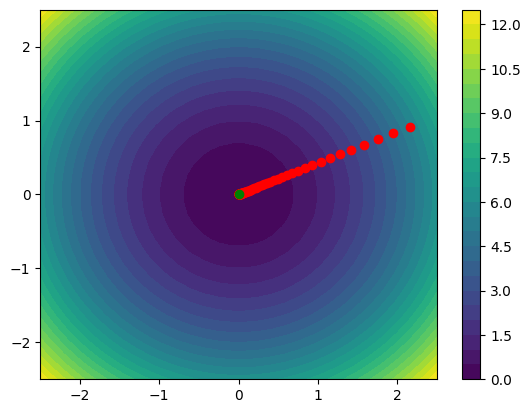

In [2]:
f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="red")
TA = 0.05

for _ in range(500):
  grad = df(P)
  P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solucion:", P, f(P))

### Parte extra

In [3]:
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

def df(p):

    p = np.array(p, dtype='float')

    h = 0.01

    grad = np.zeros_like(p)

    for idx, val in enumerate(grad):

        P = np.copy(p)

        P[idx] += h

        grad[idx] = (f(P) - f(p)) / h

    return np.array(grad, dtype='int')

Solución: [-0.7396465314576406, 1.3136808970676863] -0.1448673951420742


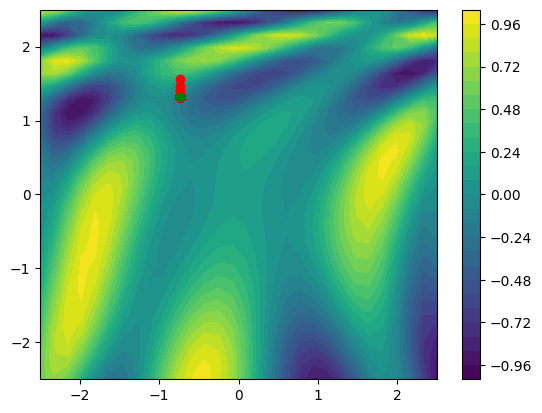

In [4]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="red")
TA = 0.05

for _ in range(500):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solución:", P, f(P))

Observando el gráfico podemos ver que existen múltiples mínimos locales. Podemos intentar buscar uno mejor haciendo iteraciones para partir de diferentes valores:

Solución:
(2.215311919187304, 1.6956407887517195) -0.9995539591327238


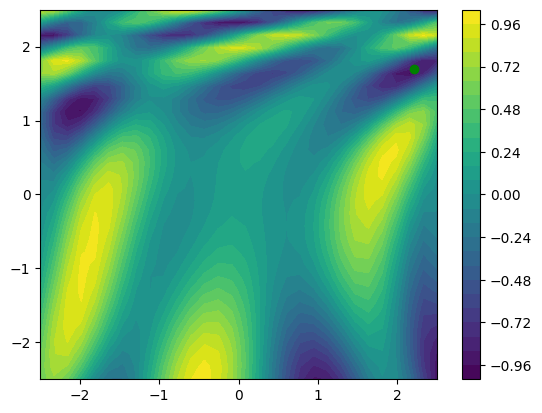

In [5]:
f_P_min = 5
P_0, P_1 = 0, 0

for i in range(1000):
    P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
    TA = 0.05

    for _ in range(500):
        grad = df(P)
        P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]

    if f(P) < f_P_min:
        f_P_min = f(P)
        P_0, P_1 = P[0], P[1]

# Dibujamos el punto
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

plt.plot(P_0, P_1, "o", c="green")

print('Solución:')
print((P_0, P_1), f_P_min)